In [20]:
# Шаг 1: Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Шаг 2: Определение функций активации и потерь
def sigmoid(x):
    """Функция активации сигмоида: f(x) = 1 / (1 + e^(-x))"""
    return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
    """Производная сигмоиды: f'(x) = f(x) * (1 - f(x))"""
    fx = sigmoid(x)
    return fx * (1 - fx)

def mse_loss(y_true, y_pred):
    """Среднеквадратическая ошибка"""
    return ((y_true - y_pred) ** 2).mean()

In [22]:
# Шаг 3: Создание класса нейронной сети
class OurNeuralNetwork:
    """
    Нейронная сеть с:
    - 2 входами
    - скрытым слоем с 2 нейронами (h1, h2)
    - выходным слоем с 1 нейроном (o1)
    """
    
    def __init__(self):
        # Инициализация весов случайными значениями
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()
        
        # Инициализация смещений
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()
    
    def feedforward(self, x):
        """Прямое распространение"""
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
        return o1
    
    def train(self, data, all_y_trues, epochs=1000, learn_rate=0.1):
        """Обучение сети"""
        losses = []
        
        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):
                # Прямое распространение (сохраняем промежуточные значения)
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(sum_h1)
                
                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = sigmoid(sum_h2)
                
                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = sigmoid(sum_o1)
                y_pred = o1
                
                # Обратное распространение - вычисление градиентов
                d_L_d_ypred = -2 * (y_true - y_pred)
                
                # Нейрон o1
                d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
                d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
                d_ypred_d_b3 = deriv_sigmoid(sum_o1)
                d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
                d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)
                
                # Нейрон h1
                d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
                d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
                d_h1_d_b1 = deriv_sigmoid(sum_h1)
                
                # Нейрон h2
                d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
                d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
                d_h2_d_b2 = deriv_sigmoid(sum_h2)
                
                # Обновление весов и смещений
                # Нейрон h1
                self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
                self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
                self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1
                
                # Нейрон h2
                self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
                self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
                self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2
                
                # Нейрон o1
                self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
                self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
                self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3
            
            # Вычисление потерь каждые 100 эпох
            if epoch % 100 == 0:
                y_preds = np.apply_along_axis(self.feedforward, 1, data)
                loss = mse_loss(all_y_trues, y_preds)
                losses.append(loss)
                print(f"Epoch {epoch} loss: {loss:.4f}")
        
        return losses

In [23]:
# Шаг 4: Подготовка данных
data = np.array([
    [-2, -1],   # Alice
    [25, 6],    # Bob
    [17, 4],    # Charlie
    [-15, -6]   # Diana
])

all_y_trues = np.array([
    1,  # Alice (Female)
    0,  # Bob (Male)
    0,  # Charlie (Male)
    1   # Diana (Female)
])

In [24]:
# Шаг 5: Создание и обучение сети
network = OurNeuralNetwork()

print("Начальные веса:")
print(f"w1: {network.w1:.4f}, w2: {network.w2:.4f}")
print(f"w3: {network.w3:.4f}, w4: {network.w4:.4f}")
print(f"w5: {network.w5:.4f}, w6: {network.w6:.4f}")

print("\nНачальные предсказания:")
for i, person in enumerate(['Alice', 'Bob', 'Charlie', 'Diana']):
    pred = network.feedforward(data[i])
    print(f"{person}: {pred:.4f}")

# Обучение сети
print("\nОбучение сети...")
losses = network.train(data, all_y_trues, epochs=1000, learn_rate=0.1)

Начальные веса:
w1: -0.2706, w2: -1.0869
w3: 0.7351, w4: 1.2585
w5: 0.0509, w6: 0.7849

Начальные предсказания:
Alice: 0.3290
Bob: 0.4982
Charlie: 0.4982
Diana: 0.3227

Обучение сети...
Epoch 0 loss: 0.3392
Epoch 100 loss: 0.0236
Epoch 200 loss: 0.0098
Epoch 300 loss: 0.0060
Epoch 400 loss: 0.0042
Epoch 500 loss: 0.0033
Epoch 600 loss: 0.0027
Epoch 700 loss: 0.0022
Epoch 800 loss: 0.0019
Epoch 900 loss: 0.0017


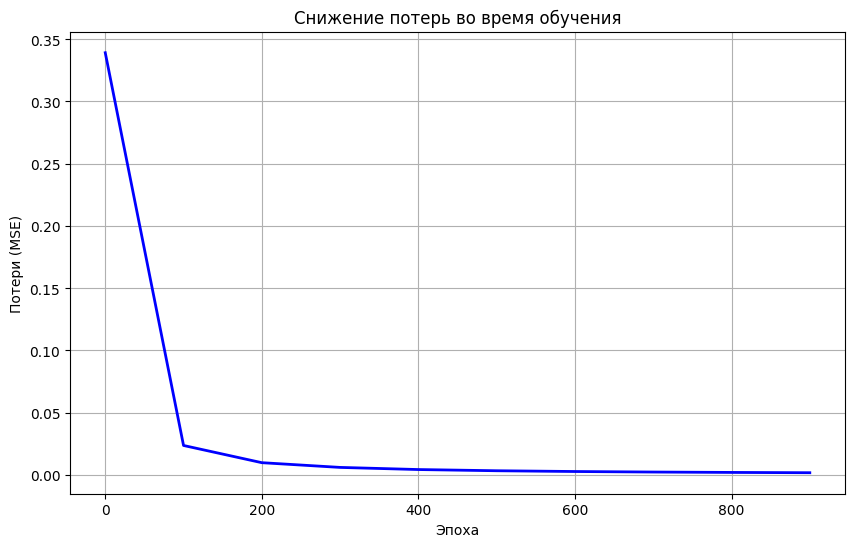

In [25]:
# Шаг 6: Визуализация процесса обучения
plt.figure(figsize=(10, 6))
plt.plot(range(0, 1000, 100), losses, 'b-', linewidth=2)
plt.title('Снижение потерь во время обучения')
plt.xlabel('Эпоха')
plt.ylabel('Потери (MSE)')
plt.grid(True)
plt.show()

In [26]:
# Шаг 7: Тестирование обученной сети
print("\nОбученные веса:")
print(f"w1: {network.w1:.4f}, w2: {network.w2:.4f}")
print(f"w3: {network.w3:.4f}, w4: {network.w4:.4f}")
print(f"w5: {network.w5:.4f}, w6: {network.w6:.4f}")

print("\nПредсказания после обучения:")
for i, person in enumerate(['Alice', 'Bob', 'Charlie', 'Diana']):
    pred = network.feedforward(data[i])
    gender = "Female" if pred > 0.5 else "Male"
    print(f"{person}: {pred:.4f} ({gender})")


Обученные веса:
w1: -1.0882, w2: -1.4956
w3: 0.9244, w4: 1.3531
w5: 3.7576, w6: -2.7962

Предсказания после обучения:
Alice: 0.9570 (Female)
Bob: 0.0389 (Male)
Charlie: 0.0389 (Male)
Diana: 0.9660 (Female)


In [27]:
# Шаг 8: Предсказание для новых данных
print("\nПредсказание для новых людей:")
emily = np.array([-7, -3])  # 128 фунтов, 63 дюйма
frank = np.array([20, 2])   # 155 фунтов, 68 дюймов

emily_pred = network.feedforward(emily)
frank_pred = network.feedforward(frank)

print(f"Emily: {emily_pred:.4f} ({'Female' if emily_pred > 0.5 else 'Male'})")
print(f"Frank: {frank_pred:.4f} ({'Female' if frank_pred > 0.5 else 'Male'})")


Предсказание для новых людей:
Emily: 0.9660 (Female)
Frank: 0.0389 (Male)


In [28]:
# Шаг 9: Анализ точности
print("\nАнализ точности:")
correct = 0
total = len(data)

for i in range(total):
    pred = network.feedforward(data[i])
    predicted_gender = 1 if pred > 0.5 else 0
    if predicted_gender == all_y_trues[i]:
        correct += 1

accuracy = correct / total * 100
print(f"Точность на обучающих данных: {accuracy:.1f}%")


Анализ точности:
Точность на обучающих данных: 100.0%
